<a href="https://colab.research.google.com/github/HabibaYeasmin/Deep_Learning/blob/main/Building_my_own_LSTM_network_for_sequential_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - loss: 0.0440 - val_loss: 0.0117
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0113 - val_loss: 0.0116
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0110 - val_loss: 0.0121
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0110 - val_loss: 0.0113
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0105 - val_loss: 0.0131
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0093 - val_loss: 0.0121
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0095 - val_loss: 0.0096
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0089 - val_loss: 0.0092
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.

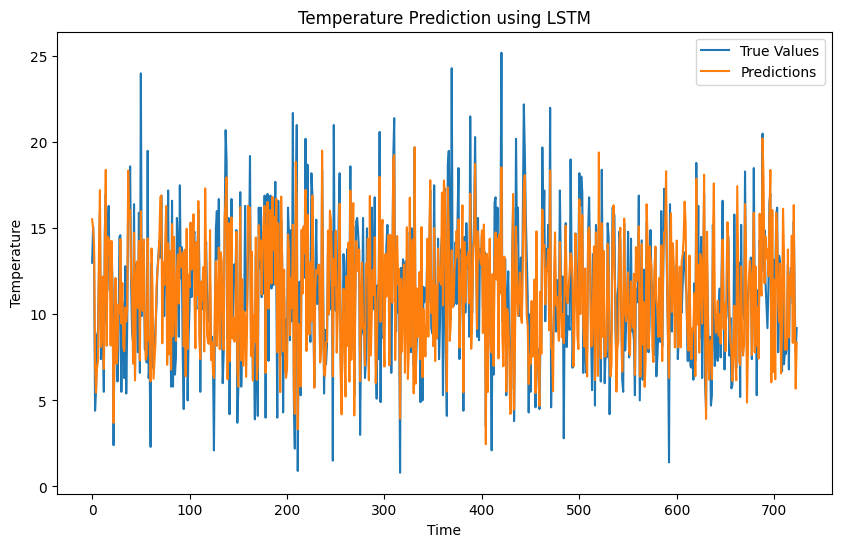

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Temp'] = scaler.fit_transform(data[['Temp']])

# Creating sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 30
sequences, labels = create_sequences(data['Temp'].values, seq_length)

# Splitng into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Reshaping input to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Trainning the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Making predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label='True Values')
plt.plot(predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Prediction using LSTM')
plt.legend()
plt.show()


1)Building my own LSTM network for sequential data using dataset from kaggle
2)Plotting prediction results.